In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,Callback
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import numpy as np


train_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\train'
valid_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\valid'
test_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\test'

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # Assuming 10 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary() 

In [13]:
# Create ImageDataGenerator instances for training, validation, and test sets
datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

valid_generator = datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 480 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)  # Assuming 8 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom Callback to Save Model Only When Accuracy & Val Accuracy >= 89%
class CustomCheckpoint(Callback):
    def __init__(self, model_path):
        super(CustomCheckpoint, self).__init__()
        self.model_path = model_path
        self.best_acc = 0  # Store the best training accuracy
        self.best_val_acc = 0  # Store the best validation accuracy

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy', 0)
        val_acc = logs.get('val_accuracy', 0)

        # Save model only if both accuracy and validation accuracy are the best seen so far
        if acc >= 0.85 and val_acc >= 0.85:
            if val_acc > self.best_val_acc or (val_acc == self.best_val_acc and acc > self.best_acc):
                self.best_acc = acc  # Update best training accuracy
                self.best_val_acc = val_acc  # Update best validation accuracy
                print(f"\n✅ Saving best model at epoch {epoch + 1} - Accuracy: {acc:.4f}, Val Accuracy: {val_acc:.4f}")
                self.model.save(self.model_path)

# Initialize the custom checkpoint
custom_checkpoint = CustomCheckpoint('vgg60_40e_64ba.h5')

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=valid_generator,
    callbacks=[custom_checkpoint]   
)



Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.1880 - loss: 3.1076 - val_accuracy: 0.5063 - val_loss: 1.5210
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.4070 - loss: 1.8331 - val_accuracy: 0.6187 - val_loss: 0.9098
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.5643 - loss: 1.2014 - val_accuracy: 0.7312 - val_loss: 0.7739
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.5653 - loss: 1.0376 - val_accuracy: 0.6875 - val_loss: 0.7060
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.6483 - loss: 0.8650 - val_accuracy: 0.7937 - val_loss: 0.6576
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.7261 - loss: 0.7571 - val_accuracy: 0.8125 - val_loss: 0.6017
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.6973 - loss: 0.7606 - val_accuracy: 0.7750 - val_loss: 0.5858
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.7387 - loss: 0.6878 - val_accuracy: 0.7812 - val_loss: 0.5868
Epoch 9/


✅ Saving best model at epoch 20 - Accuracy: 0.8521, Val Accuracy: 0.8750
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8593 - loss: 0.3961 - val_accuracy: 0.8750 - val_loss: 0.4148
Epoch 21/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.8290 - loss: 0.4036 - val_accuracy: 0.8625 - val_loss: 0.4128
Epoch 22/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8751 - loss: 0.3448 - val_accuracy: 0.8562 - val_loss: 0.3977
Epoch 23/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8672 - loss: 0.3529 - val_accuracy: 0.8250 - val_loss: 0.4201
Epoch 24/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.8410 - loss: 0.3815 - val_accuracy: 0.8625 - val_loss: 0.3884
Epoch 25/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8684 - loss: 0.3408


✅ Saving best model at epoch 25 - Accuracy: 0.8813, Val Accuracy: 0.8938
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8698 - loss: 0.3383 - val_accuracy: 0.8938 - val_loss: 0.3690
Epoch 26/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8949 - loss: 0.3137 - val_accuracy: 0.8250 - val_loss: 0.4645
Epoch 27/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8656 - loss: 0.3681 - val_accuracy: 0.8687 - val_loss: 0.3716
Epoch 28/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8761 - loss: 0.3342 - val_accuracy: 0.8750 - val_loss: 0.3325
Epoch 29/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9163 - loss: 0.2731 - val_accuracy: 0.8687 - val_loss: 0.3791
Epoch 30/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9205 - loss: 0.2534 - val_accuracy: 0.8562 - val_loss: 0.4354
Epoch 31/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.8836 - loss: 0.3095 - val_accuracy: 0.8750 - val_loss: 0.3401
Epoch 32/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8


✅ Saving best model at epoch 32 - Accuracy: 0.8771, Val Accuracy: 0.9000
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8835 - loss: 0.2915 - val_accuracy: 0.9000 - val_loss: 0.3279
Epoch 33/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.8853 - loss: 0.3058 - val_accuracy: 0.8500 - val_loss: 0.3907
Epoch 34/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8964 - loss: 0.2559


✅ Saving best model at epoch 34 - Accuracy: 0.8938, Val Accuracy: 0.9125
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.8961 - loss: 0.2577 - val_accuracy: 0.9125 - val_loss: 0.3678
Epoch 35/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.8913 - loss: 0.2672 - val_accuracy: 0.9000 - val_loss: 0.3441
Epoch 36/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9085 - loss: 0.2431 - val_accuracy: 0.8875 - val_loss: 0.3159
Epoch 37/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8795 - loss: 0.2790


✅ Saving best model at epoch 37 - Accuracy: 0.9083, Val Accuracy: 0.9187
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8827 - loss: 0.2747 - val_accuracy: 0.9187 - val_loss: 0.3246
Epoch 38/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9046 - loss: 0.2360 - val_accuracy: 0.8938 - val_loss: 0.3164
Epoch 39/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9224 - loss: 0.2118 - val_accuracy: 0.8938 - val_loss: 0.3345
Epoch 40/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9260 - loss: 0.1996 - val_accuracy: 0.8687 - val_loss: 0.3660


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8398 - loss: 0.3810
Test accuracy: 84.375
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


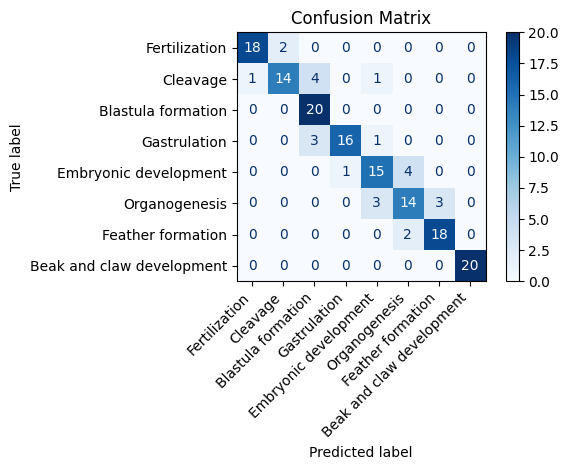

Classification Report:
                           precision    recall  f1-score   support

            Fertilization       0.95      0.90      0.92        20
                 Cleavage       0.88      0.70      0.78        20
       Blastula formation       0.74      1.00      0.85        20
             Gastrulation       0.94      0.80      0.86        20
    Embryonic development       0.75      0.75      0.75        20
            Organogenesis       0.70      0.70      0.70        20
        Feather formation       0.86      0.90      0.88        20
Beak and claw development       1.00      1.00      1.00        20

                 accuracy                           0.84       160
                macro avg       0.85      0.84      0.84       160
             weighted avg       0.85      0.84      0.84       160



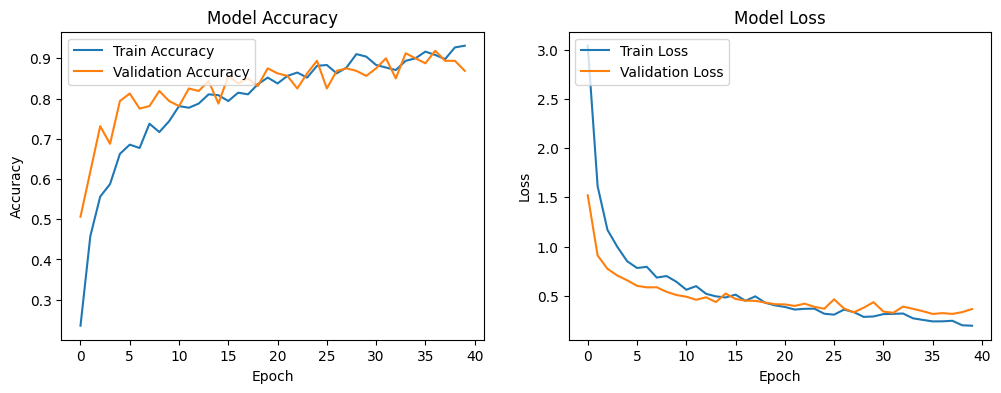

In [23]:
# Evaluate the model
from tensorflow.keras.models import load_model

best_model = load_model('vgg60_40e_64ba.h5')
test_loss, test_acc = model.evaluate(test_generator)
acc = test_acc * 100

print(f'Test accuracy: {acc}')


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)

# Define the developmental stage labels
developmental_stages = [
    "Fertilization", 
    "Cleavage", 
    "Blastula formation", 
    "Gastrulation", 
    "Embryonic development", 
    "Organogenesis", 
    "Feather formation", 
    "Beak and claw development"
]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=developmental_stages)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


# Generate classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, y_pred_classes, target_names=developmental_stages)
print(f'Classification Report:\n{report}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()
model.save('vgg60_40e_64bas.h5')


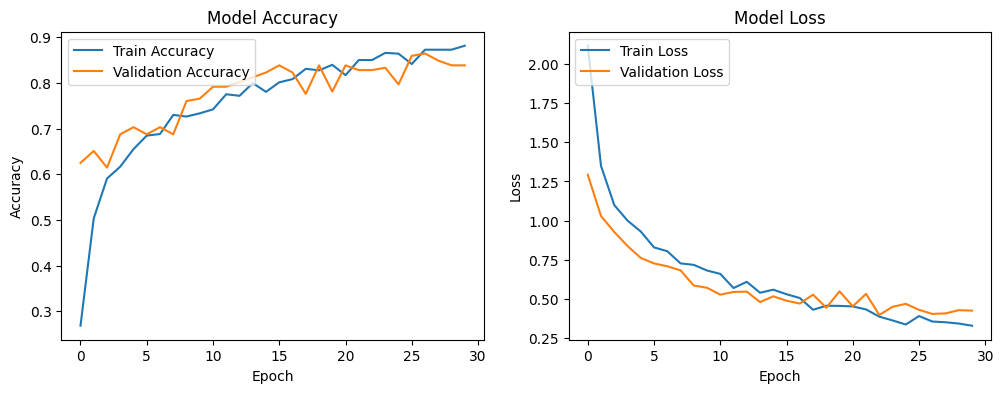

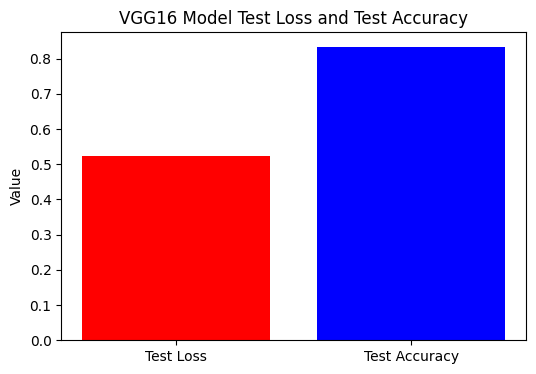

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


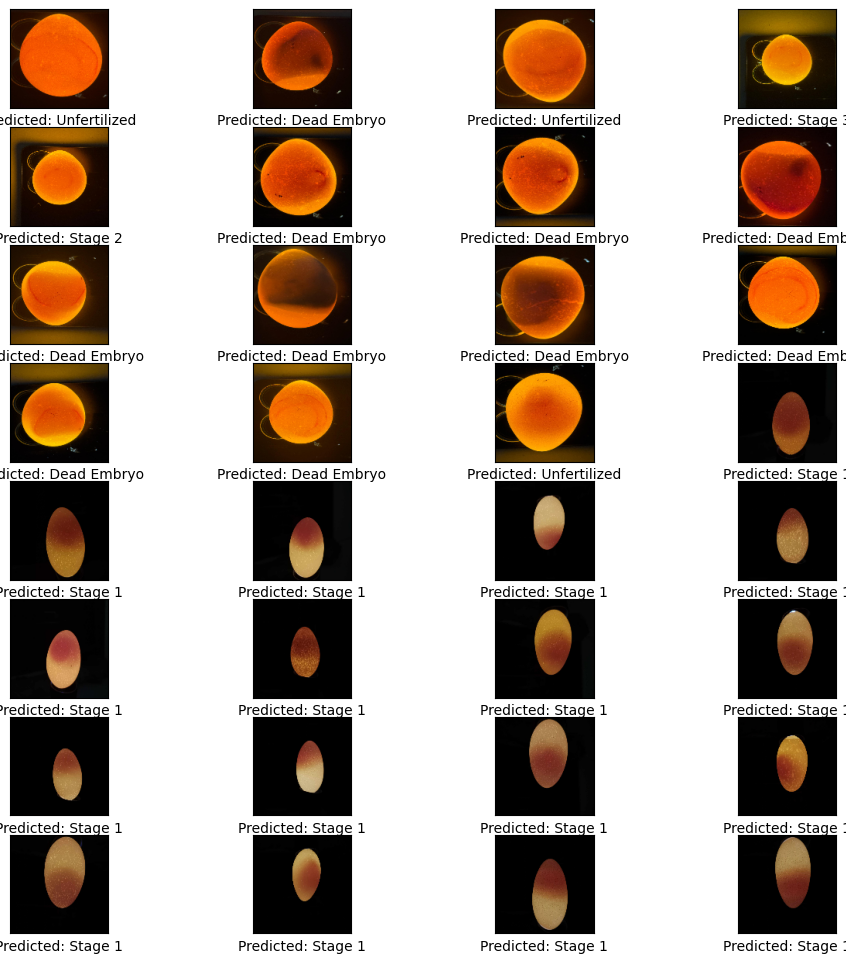

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


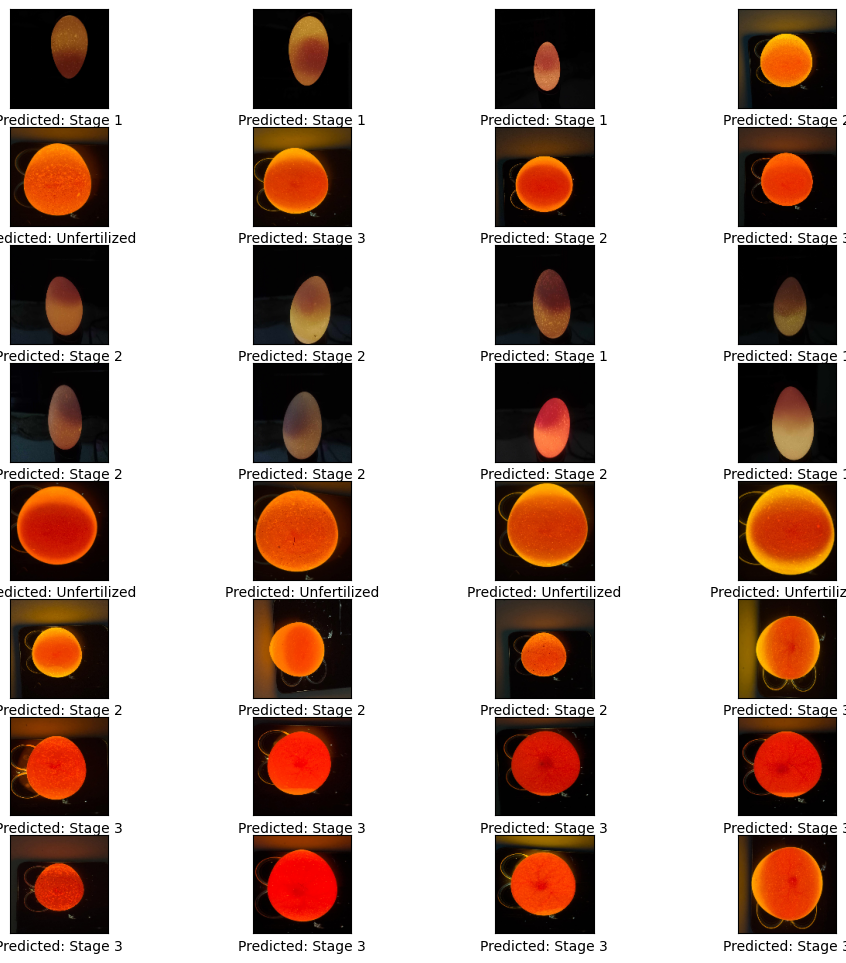

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


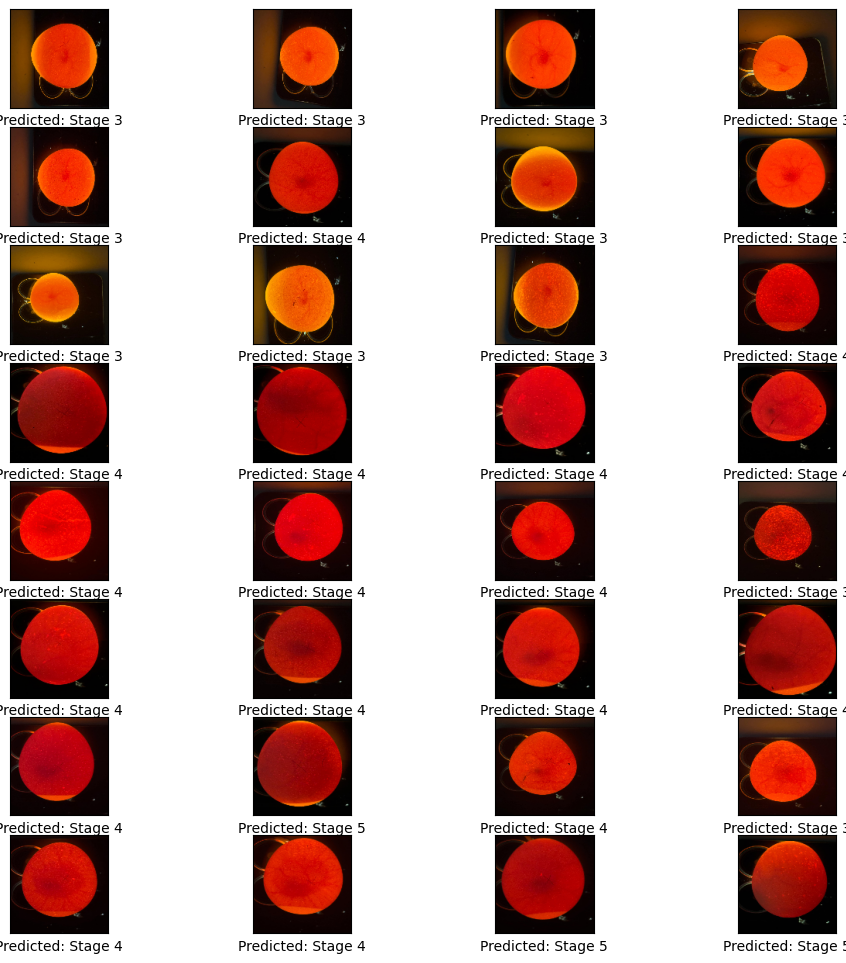

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


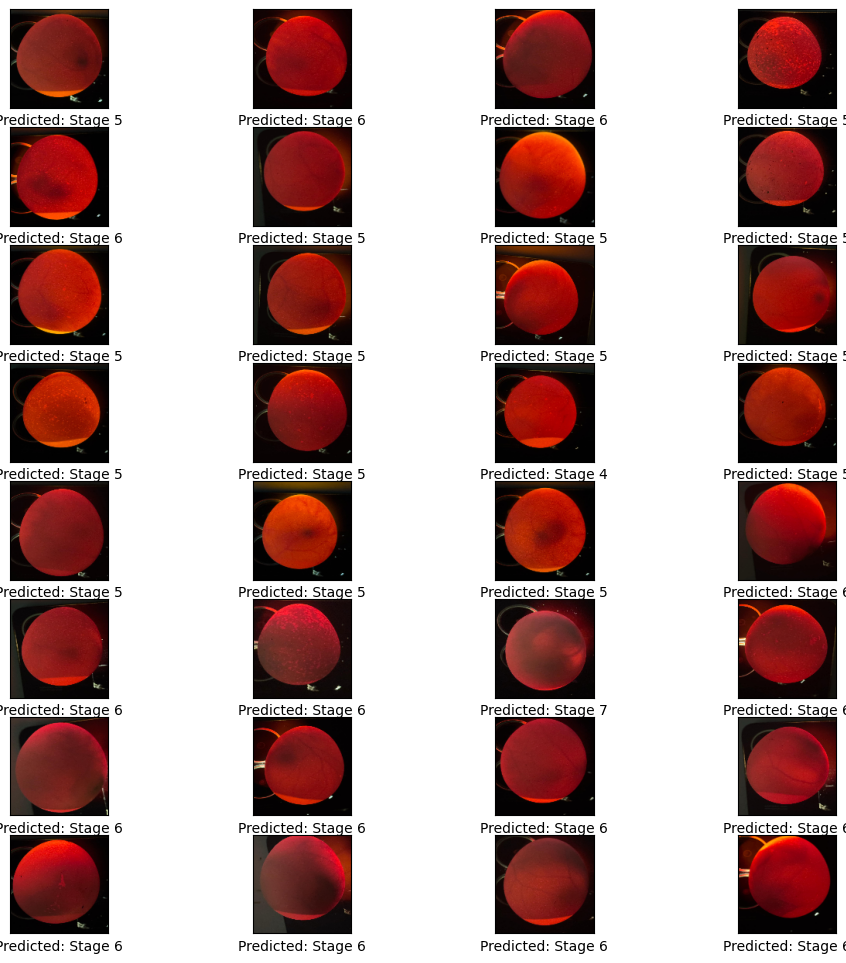

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


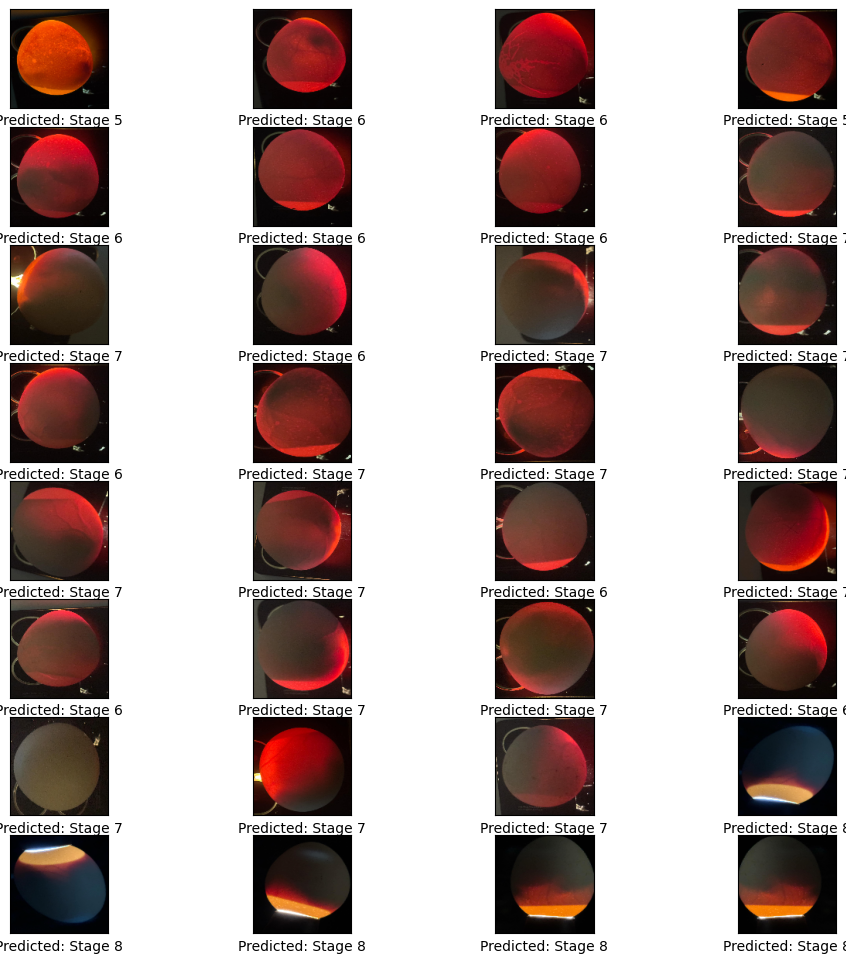

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


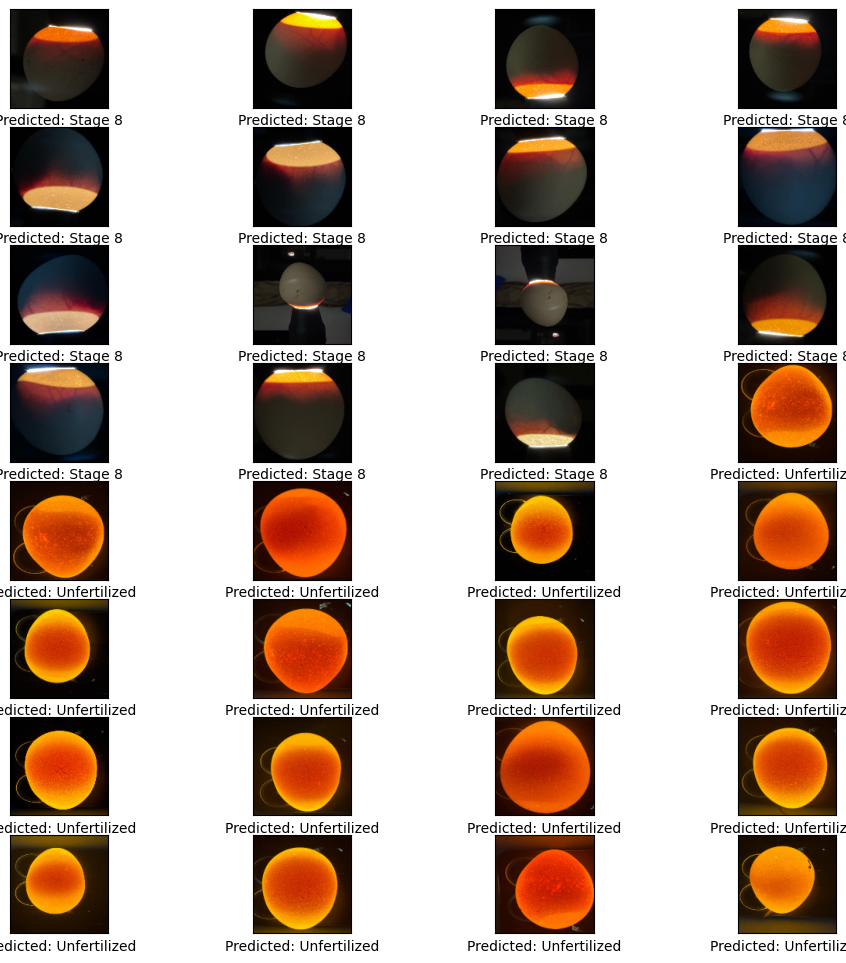

In [ ]:


# Display images with their predicted labels
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    
    num_images = len(images)
    num_cols = 4
    num_rows = (num_images // num_cols) + (num_images % num_cols > 0)
    
    plt.figure(figsize=(12, 12))
    for j in range(num_images):
        plt.subplot(num_rows, num_cols, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[j])
        plt.xlabel(f'Predicted: {class_labels[predicted_classes[j]]}')
    plt.show()

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)  # Assuming 10 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,171,400 (80.76 MB)

 Trainable params: 6,456,712 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)